<a href="https://colab.research.google.com/github/katherymbr/Proyecto_Fractales/blob/main/fractales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto de mamografias con mc - Deteción con Fractales

FUNCIONES Y LIBRERIAS

In [1]:
import imageio as io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# LEER UNA IMAGEN

def leer_imagen(rute):
    imagen= io.imread(rute)   
    return (imagen)

ruta= '/content/drive/MyDrive/'

In [3]:
# TAMAÑO DE LA IMAGEN Y EL PIXEL MÁXIMO Y MÍNIMO

def tamaño_imagen(imagen):
    print('dimensiones de la imagen', imagen.shape)
    print ('valor minimo del pixel:',imagen.min())
    print('valor máximo del pixel:', imagen.max())

In [4]:
# GRAFICAR UNA IMAGEN CON TÍTULO

def graficar_imagen(imagen, titulo, tamaño=100):
    fig, ax = plt.subplots(dpi=tamaño)
    ax.imshow(imagen,cmap='gray')
    plt.title(str(titulo))
    plt.show

In [5]:
# GRAFICAR 2 IMAGENES HORIZONTALES CON TÍTULO

def graficar_dosimagenes_horizontaltitulo(imagen_oscura, imagen_brillante, titulo1, titulo2, tamaño=100):
    fig, ax = plt.subplots(1,2, dpi=tamaño)
    ax[0].imshow(imagen_oscura, cmap='gray')  # DEBE SER LA IMAGEN DELA PADING, NO LA IMAGEN
    ax[0].set_axis_off()
    plt.title(str(titulo1))
    ax[1].imshow(imagen_brillante, cmap='gray')
    ax[1].set_axis_off()
    plt.title(str(titulo2))
    plt.show()


In [6]:
#  GRAFICAR 3 IMAGENES HORIZONTAL + TÍTULO

def graficar_tresimagenes_horizontaltitulo(imagen_oscura, imagen_brillante, imagen1, titulo1, titulo2, titulo3, tamaño=400):
    fig, ax = plt.subplots(1,3, dpi=tamaño)
    ax[0].imshow(imagen_oscura, cmap='gray')  
    ax[0].set_axis_off()
    ax[0].set_title(str(titulo1), fontsize=5)
    #plt.title(str(titulo1))
    ax[1].imshow(imagen_brillante, cmap='gray')
    ax[1].set_axis_off()
    ax[1].set_title(str(titulo2), fontsize=5)
    #plt.title(str(titulo2))
    ax[2].imshow(imagen1, cmap='gray')
    ax[2].set_axis_off()
    ax[2].set_title(str(titulo3), fontsize=5)
    plt.show()


In [7]:
# CORTAR UNA IMAGEN

def imagen_recorte (imagen,x,y,r):
    imagen_recorte= imagen[y-r:y+r , x-r:x+r]
    #graficar_imagen(imagen_recorte , 'imagen recortada', tamaño=90)
    return(imagen_recorte)

In [8]:
# BOX COUNTING

def box_counting(im, Dx=0, Dy=0, figure=True):

    # Definición del area del viewport
    viewport_y, viewport_x = im.shape
    beta = 1.5 #Factor de incremento del viewport con respecto a las dimensiones de la imagen 
    viewport_y = int(viewport_y*beta)
    viewport_x = int(viewport_x*beta)
    viewport = np.zeros((viewport_y,viewport_x))
    # se indexa la imagen en el viewport según el corrimiento en X - Y deseado
    viewport[Dy:im.shape[0]+Dy, Dx:im.shape[1]+Dx] = im  # Dy alto de la imagen, Dx=1 largo

    # Obtengo la dimensión mínima de la imagen en x o y.
    min_axes = min(viewport.shape) # para hallar cual es el eje menor eje del viewport, si el ancho o el largo (entre x o y)
    #print("eje menor, del viewport=", min_axes)
    # Obtener la mayor potencia de 2 que sea menor al valor de min_axes 
    nbase = 2**np.floor(np.log(min_axes)/np.log(2)) # np.floor toma la parte entera del reciproco entre logaritmos sin aproximarlo
    # Se obtiene el exponente
    n = int(np.log(nbase)/np.log(2))
    # Se obtienen los boxes (media) en base 2^n  hasta 2^1
    boxes = 2**np.arange(1, n+1)[::-1]
    #print(boxes)
    
    # considerando el tamaño de los boxes se cuentan los pixeles que hay en cada box, para cada partición 2^n
    counts = []
    for box in boxes:
        bc = np.add.reduceat(
            np.add.reduceat(viewport, np.arange(0, viewport_y, box), axis=0),
                                np.arange(0, viewport_x, box), axis=1)
        #Se cuentan el número de box cuya suma de pixels sea mayor a 0 y menor box^2   
        counts.append(len(np.where((bc > 0) & (bc < box**2))[0]))


    a = np.log(1/boxes) 
    b = np.log(counts)
    # se obtiene la pendiente D que determina el box counting
    D = np.polyfit(a, b, 1)
    # se genera la recta de ajuste a partir de D
    fit = np.polyval(D, a)   
      
    return np.round(D[0],4)
  

# EJECUCIÓN

IMPLEMENTACIÓN

In [9]:
# INFORMACIÓN DEL DATASET 'MIAS'

mg_df = pd.read_table('/content/drive/MyDrive/Info.txt' , sep=" ")
print('Dataset MIAS')
print('nro, img_MIAS, tejido, anormalidad, gravedad, x, y, c')
print(mg_df)
mg_df.head(10)

Dataset MIAS
nro, img_MIAS, tejido, anormalidad, gravedad, x, y, c
     NO_IMG  T  ANOR    G  XXX  YYY    CCC
0    mdb001  G  CIRC    B  535  425  197.0
1    mdb002  G  CIRC    B  522  280   69.0
2    mdb003  D  NORM  NaN  NaN  NaN    NaN
3    mdb004  D  NORM  NaN  NaN  NaN    NaN
4    mdb005  F  CIRC    B  477  133   30.0
..      ... ..   ...  ...  ...  ...    ...
325  mdb318  D  NORM  NaN  NaN  NaN    NaN
326  mdb319  D  NORM  NaN  NaN  NaN    NaN
327  mdb320  D  NORM  NaN  NaN  NaN    NaN
328  mdb321  D  NORM  NaN  NaN  NaN    NaN
329  mdb322  D  NORM  NaN  NaN  NaN    NaN

[330 rows x 7 columns]


,NO_IMG,T,ANOR,G,XXX,YYY,CCC
0,mdb001,G,CIRC,B,535,425,197.0
1,mdb002,G,CIRC,B,522,280,69.0
2,mdb003,D,NORM,NaN,NaN,NaN,NaN
3,mdb004,D,NORM,NaN,NaN,NaN,NaN
4,mdb005,F,CIRC,B,477,133,30.0
5,mdb005,F,CIRC,B,500,168,26.0
6,mdb006,F,NORM,NaN,NaN,NaN,NaN
7,mdb007,G,NORM,NaN,NaN,NaN,NaN
8,mdb008,G,NORM,NaN,NaN,NaN,NaN
9,mdb009,F,NORM,NaN,NaN,NaN,NaN


In [10]:
# FILTRO IMAGENES CON NOMALIAS (ANOR), MICROCALCIFICCAIONES (CALC) MALIGNAS (M)

df_calc = mg_df[mg_df['ANOR'] == 'CALC']
df_calc = mg_df[mg_df['G']== 'M']
df_calc.head(100)

,NO_IMG,T,ANOR,G,XXX,YYY,CCC
23,mdb023,G,CIRC,M,538,681,29.0
28,mdb028,F,CIRC,M,338,314,56.0
58,mdb058,D,MISC,M,318,359,27.0
72,mdb072,G,ASYM,M,266,517,28.0
75,mdb075,F,ASYM,M,468,717,23.0
90,mdb090,G,ASYM,M,510,547,49.0
92,mdb092,F,ASYM,M,423,662,43.0
95,mdb095,F,ASYM,M,466,517,29.0
102,mdb102,D,ASYM,M,415,460,38.0
105,mdb105,D,ASYM,M,516,279,98.0


# **Nro.1 . IMAGEN mdb209**

In [11]:
imagen209= leer_imagen (ruta+'mdb209.pgm')
#graficar_imagen(imagen209 , 'Mamografia1: Microcalcificaciones', tamaño=90)
tamaño_imagen(imagen209)

dimensiones de la imagen (1024, 1024)
valor minimo del pixel: 0
valor máximo del pixel: 228


In [12]:
imagen_r_209= imagen_recorte (imagen209,647,503,87)
print(imagen_r_209.shape)

(174, 174)


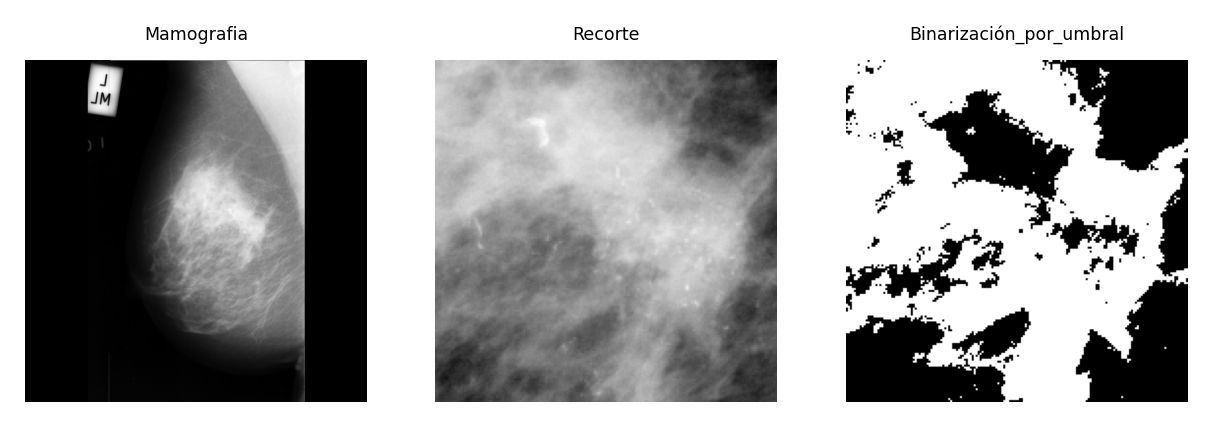

In [13]:
# Binarización de la imagen (espacio Y) mediante un Umbral

#@title Binarización de imagen mediante un umbral. { run: "auto" }



threshold_1 = 0.62 #@param {type:"slider", min:0, max:1, step:0.01}
threshold_2 = 0.8 #@param {type:"slider", min:0, max:1, step:0.01}
im_binary1 = np.copy(imagen_r_209)/255.0 

mask_1 = im_binary1 >= threshold_1 
mask_2 = im_binary1 <= threshold_2
mask_3 = im_binary1 < threshold_1 
mask_4 = im_binary1 > threshold_2


im_binary1[mask_1] = 1 #pixeles mayores, iguakes a threshold van a tomar el valor de 1
im_binary1[mask_2] = 1 #pixeles menores a threshold van a tomar el valor de 0
im_binary1[mask_3] = 0 #pixeles mayores, iguakes a threshold van a tomar el valor de 1
im_binary1[mask_4] = 0

im_binary1.astype(np.uint8)
#plt.imshow(im_binary1*255, cmap='gray')
#plt.axis('on')
#plt.title('Imagen Binarizada')
#plt.show()
tamaño= im_binary1.shape
graficar_tresimagenes_horizontaltitulo(imagen209, imagen_r_209, im_binary1, 'Mamografia', 'Recorte', 'Binarización_por_umbral', tamaño=250)

#graficar_imagen(im_binary1, ' imagen _binarizada', tamaño=100)

#print("tamaño de la imagen binarizada:", tamaño)

Dimension fractal - box counting

In [14]:
conteo = box_counting(im_binary1, Dx=0, Dy=0 , figure=True) #ingreso la imagen binarizada y el desplazamiento 
#%%
dxy =[0, 1, 2, 5, 8, 12] # desplazamiento del corrimiento
conteo=[]
for a in dxy:
    cont = box_counting(im_binary1, Dx=a, Dy=a, figure=False)
    conteo.append(cont)
    print('Conteo a '+str(a) +' dxy: '+ str(cont))
conteo_prom = np.round(np.sum(conteo)/len(conteo),4)

print("*LA DIMENSION FRACTAL ES:", conteo_prom)

Conteo a 0 dxy: 1.4227
Conteo a 1 dxy: 1.4528
Conteo a 2 dxy: 1.4308
Conteo a 5 dxy: 1.4553
Conteo a 8 dxy: 1.4245
Conteo a 12 dxy: 1.4289
*LA DIMENSION FRACTAL ES: 1.4358


# **Nro.3 . IMAGEN mdb264**

In [15]:
imagen264= leer_imagen (ruta+'mdb264.pgm')
#graficar_imagen(imagen264 , 'Mamografia3: Microcalcificaciones', tamaño=90)
tamaño_imagen(imagen264)

dimensiones de la imagen (1024, 1024)
valor minimo del pixel: 0
valor máximo del pixel: 215


In [16]:
imagen_r_264= imagen_recorte (imagen264,596,431,36)
print(imagen_r_264.shape)

(72, 72)


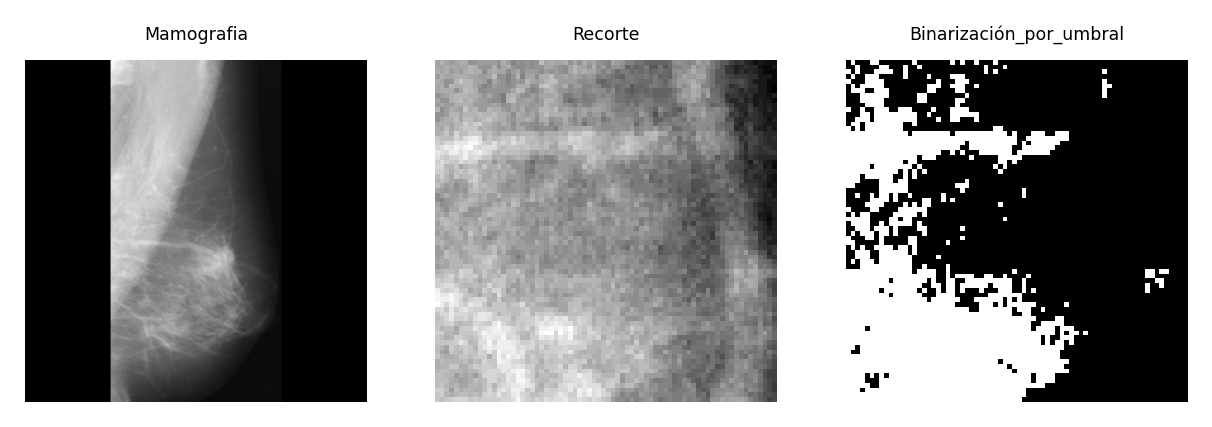

In [17]:
# Binarización de la imagen (espacio Y) mediante un Umbral

#@title Binarización de imagen mediante un umbral. { run: "auto" }



threshold_1 = 0.27 #@param {type:"slider", min:0, max:1, step:0.01}
threshold_2 = 0.63 #@param {type:"slider", min:0, max:1, step:0.01}
im_binary3 = np.copy(imagen_r_264)/255.0 

mask_1 = im_binary3 >= threshold_1 
mask_2 = im_binary3 <= threshold_2
mask_3 = im_binary3 < threshold_1 
mask_4 = im_binary3 > threshold_2


im_binary3[mask_1] = 1 #pixeles mayores, iguakes a threshold van a tomar el valor de 1
im_binary3[mask_2] = 1 #pixeles menores a threshold van a tomar el valor de 0
im_binary3[mask_3] = 0 #pixeles mayores, iguakes a threshold van a tomar el valor de 1
im_binary3[mask_4] = 0

im_binary3.astype(np.uint8)
#plt.imshow(im_binary1*255, cmap='gray')
#plt.axis('on')
#plt.title('Imagen Binarizada')
#plt.show()
tamaño= im_binary3.shape
graficar_tresimagenes_horizontaltitulo(imagen264, imagen_r_264, im_binary3, 'Mamografia', 'Recorte', 'Binarización_por_umbral', tamaño=250)

#graficar_imagen(im_binary1, ' imagen _binarizada', tamaño=100)

#print("tamaño de la imagen binarizada:", tamaño)

Box counting

In [18]:
conteo = box_counting(im_binary3, Dx=0, Dy=0 , figure=True) #ingreso la imagen binarizada y el desplazamiento 
#%%
dxy =[0, 1, 2, 5, 8, 12] # desplazamiento del corrimiento
conteo=[]
for a in dxy:
    cont = box_counting(im_binary3, Dx=a, Dy=a, figure=False)
    conteo.append(cont)
    print('Conteo a '+str(a) +' dxy: '+ str(cont))
conteo_prom = np.round(np.sum(conteo)/len(conteo),4)

print("*LA DIMENSION FRACTAL ES:", conteo_prom)

Conteo a 0 dxy: 1.3249
Conteo a 1 dxy: 1.3544
Conteo a 2 dxy: 1.3461
Conteo a 5 dxy: 1.3574
Conteo a 8 dxy: 1.3228
Conteo a 12 dxy: 1.3023
*LA DIMENSION FRACTAL ES: 1.3347


# **Nro.4 . IMAGEN mdb265**

In [19]:
# MAMOGRAFIA 4

imagen265= leer_imagen (ruta+'mdb265.pgm')
#graficar_imagen(imagen265 , 'Mamografia4: Microcalcificaciones', tamaño=90)
tamaño_imagen(imagen265)

dimensiones de la imagen (1024, 1024)
valor minimo del pixel: 0
valor máximo del pixel: 242


In [20]:
imagen_r_265= imagen_recorte (imagen264,593,498,60)
print(imagen_r_265.shape)

(120, 120)


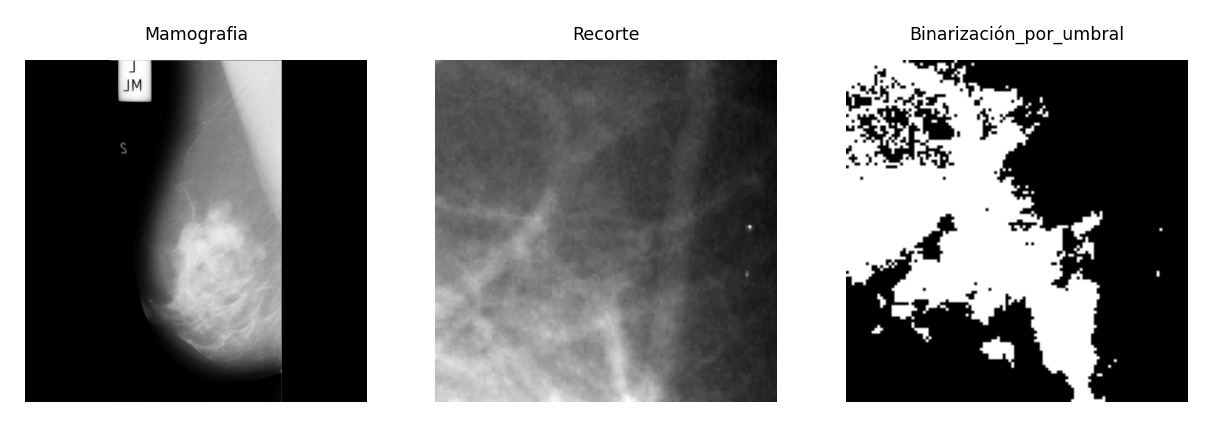

In [21]:
# Binarización de la imagen (espacio Y) mediante un Umbral

#@title Binarización de imagen mediante un umbral. { run: "auto" }



threshold_1 = 0.28 #@param {type:"slider", min:0, max:1, step:0.01}
threshold_2 = 0.37 #@param {type:"slider", min:0, max:1, step:0.01}
im_binary4 = np.copy(imagen_r_265)/255.0 

mask_1 = im_binary4 >= threshold_1 
mask_2 = im_binary4 <= threshold_2
mask_3 = im_binary4 < threshold_1 
mask_4 = im_binary4 > threshold_2


im_binary4[mask_1] = 1 #pixeles mayores, iguakes a threshold van a tomar el valor de 1
im_binary4[mask_2] = 1 #pixeles menores a threshold van a tomar el valor de 0
im_binary4[mask_3] = 0 #pixeles mayores, iguakes a threshold van a tomar el valor de 1
im_binary4[mask_4] = 0

im_binary4.astype(np.uint8)
#plt.imshow(im_binary1*255, cmap='gray')
#plt.axis('on')
#plt.title('Imagen Binarizada')
#plt.show()
tamaño= im_binary4.shape
graficar_tresimagenes_horizontaltitulo(imagen265, imagen_r_265, im_binary4, 'Mamografia', 'Recorte', 'Binarización_por_umbral', tamaño=250)

#graficar_imagen(im_binary1, ' imagen _binarizada', tamaño=100)

#print("tamaño de la imagen binarizada:", tamaño)

In [22]:
conteo = box_counting(im_binary4, Dx=0, Dy=0 , figure=True) #ingreso la imagen binarizada y el desplazamiento 
#%%
dxy =[0, 1, 2, 5, 8, 12] # desplazamiento del corrimiento
conteo=[]
for a in dxy:
    cont = box_counting(im_binary4, Dx=a, Dy=a, figure=False)
    conteo.append(cont)
    print('Conteo a '+str(a) +' dxy: '+ str(cont))
conteo_prom = np.round(np.sum(conteo)/len(conteo),4)

print("*LA DIMENSION FRACTAL ES:", conteo_prom)

Conteo a 0 dxy: 1.5041
Conteo a 1 dxy: 1.5276
Conteo a 2 dxy: 1.5107
Conteo a 5 dxy: 1.532
Conteo a 8 dxy: 1.5006
Conteo a 12 dxy: 1.3708
*LA DIMENSION FRACTAL ES: 1.491


# **Nro.5 . IMAGEN mdb270**

In [27]:
imagen270= leer_imagen (ruta+'mdb270.pgm')
#graficar_imagen(imagen270 , 'Mamografia5: Microcalcificaciones', tamaño=90)
tamaño_imagen(imagen270)

dimensiones de la imagen (1024, 1024)
valor minimo del pixel: 0
valor máximo del pixel: 241


In [24]:
imagen_r_270= imagen_recorte (imagen270,593,498,60)
print(imagen_r_270.shape)

(120, 120)


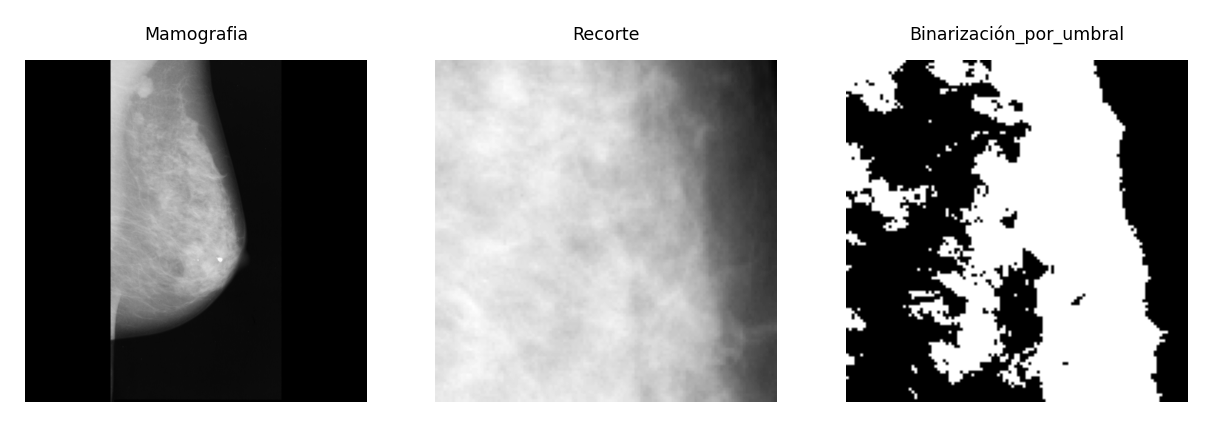

In [25]:
# Binarización de la imagen (espacio Y) mediante un Umbral

#@title Binarización de imagen mediante un umbral. { run: "auto" }



threshold_1 = 0.31 #@param {type:"slider", min:0, max:1, step:0.01}
threshold_2 = 0.68 #@param {type:"slider", min:0, max:1, step:0.01}
im_binary5 = np.copy(imagen_r_270)/255.0 

mask_1 = im_binary5 >= threshold_1 
mask_2 = im_binary5 <= threshold_2
mask_3 = im_binary5 < threshold_1 
mask_4 = im_binary5 > threshold_2


im_binary5[mask_1] = 1 #pixeles mayores, iguakes a threshold van a tomar el valor de 1
im_binary5[mask_2] = 1 #pixeles menores a threshold van a tomar el valor de 0
im_binary5[mask_3] = 0 #pixeles mayores, iguakes a threshold van a tomar el valor de 1
im_binary5[mask_4] = 0

im_binary5.astype(np.uint8)

tamaño= im_binary5.shape
graficar_tresimagenes_horizontaltitulo(imagen270, imagen_r_270, im_binary5, 'Mamografia', 'Recorte', 'Binarización_por_umbral', tamaño=250)



In [26]:
conteo = box_counting(im_binary5, Dx=0, Dy=0 , figure=True) #ingreso la imagen binarizada y el desplazamiento 
#%%
dxy =[0, 1, 2, 5, 8, 12] # desplazamiento del corrimiento
conteo=[]
for a in dxy:
    cont = box_counting(im_binary5, Dx=a, Dy=a, figure=False)
    conteo.append(cont)
    print('Conteo a '+str(a) +' dxy: '+ str(cont))
conteo_prom = np.round(np.sum(conteo)/len(conteo),4)

print("*LA DIMENSION FRACTAL ES:", conteo_prom)

Conteo a 0 dxy: 1.4925
Conteo a 1 dxy: 1.5297
Conteo a 2 dxy: 1.5112
Conteo a 5 dxy: 1.5286
Conteo a 8 dxy: 1.4925
Conteo a 12 dxy: 1.3366
*LA DIMENSION FRACTAL ES: 1.4818
